# Kaggle Competition for House Prices: Advanced Regression Techniques

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)
df_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [143]:
df_test = pd.read_csv('test.csv')
print(df_test.shape)
df_test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot: >

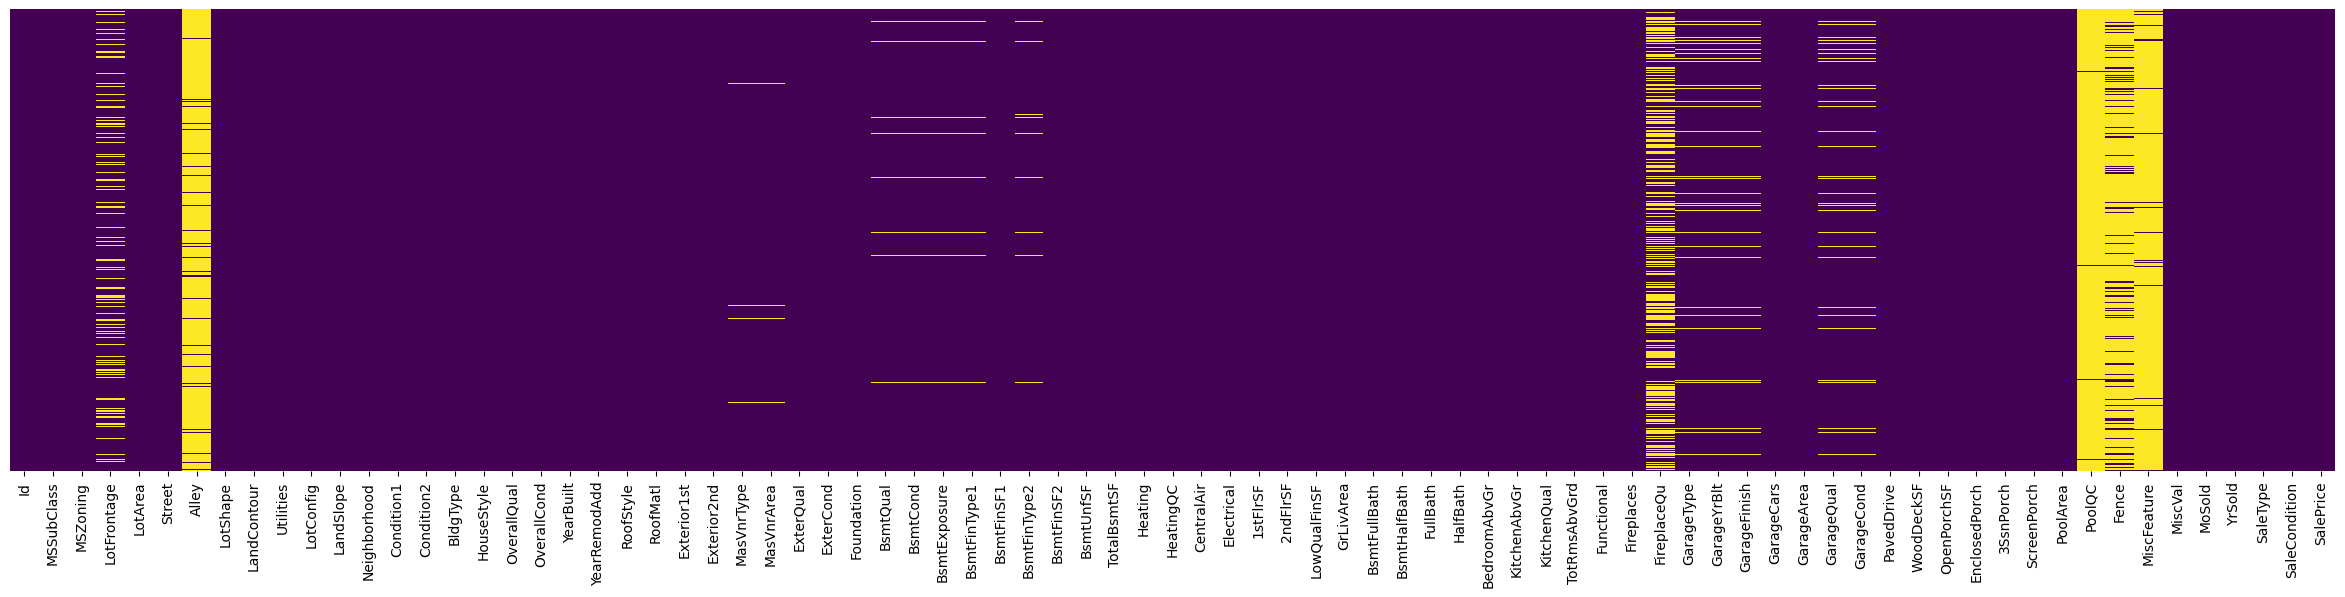

In [144]:
plt.figure(figsize=(30, 6))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [145]:
null_features = [features for features in df_train.columns if df_train[features].isnull().sum() > 730]
print(null_features)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [146]:
df_train.drop(null_features, axis=1, inplace=True)
df_test.drop(null_features, axis=1, inplace=True)

In [147]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [148]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)

In [149]:
df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0], inplace=True)
df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0], inplace=True)

In [150]:
df_train.drop('GarageYrBlt', axis=1, inplace=True)

In [151]:
df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0], inplace=True)

In [152]:
df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0], inplace=True)
df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0], inplace=True)

In [153]:
df_train.shape

(1460, 76)

In [154]:
df_train.drop('Id', axis=1, inplace=True)

In [155]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [156]:
null_features = [features for features in df_train.columns if df_train[features].isnull().sum() > 0]
print(len(null_features))
print(null_features)

8
['MasVnrType', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType']


In [157]:
df_train[null_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    1452 non-null   object 
 1   MasVnrArea    1452 non-null   float64
 2   BsmtExposure  1422 non-null   object 
 3   BsmtFinType1  1423 non-null   object 
 4   BsmtFinType2  1422 non-null   object 
 5   Electrical    1459 non-null   object 
 6   FireplaceQu   770 non-null    object 
 7   GarageType    1379 non-null   object 
dtypes: float64(1), object(7)
memory usage: 91.4+ KB


In [158]:
df_train[null_features].isnull().sum()

MasVnrType        8
MasVnrArea        8
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
dtype: int64

In [159]:
df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0], inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0], inplace=True)

<AxesSubplot: >

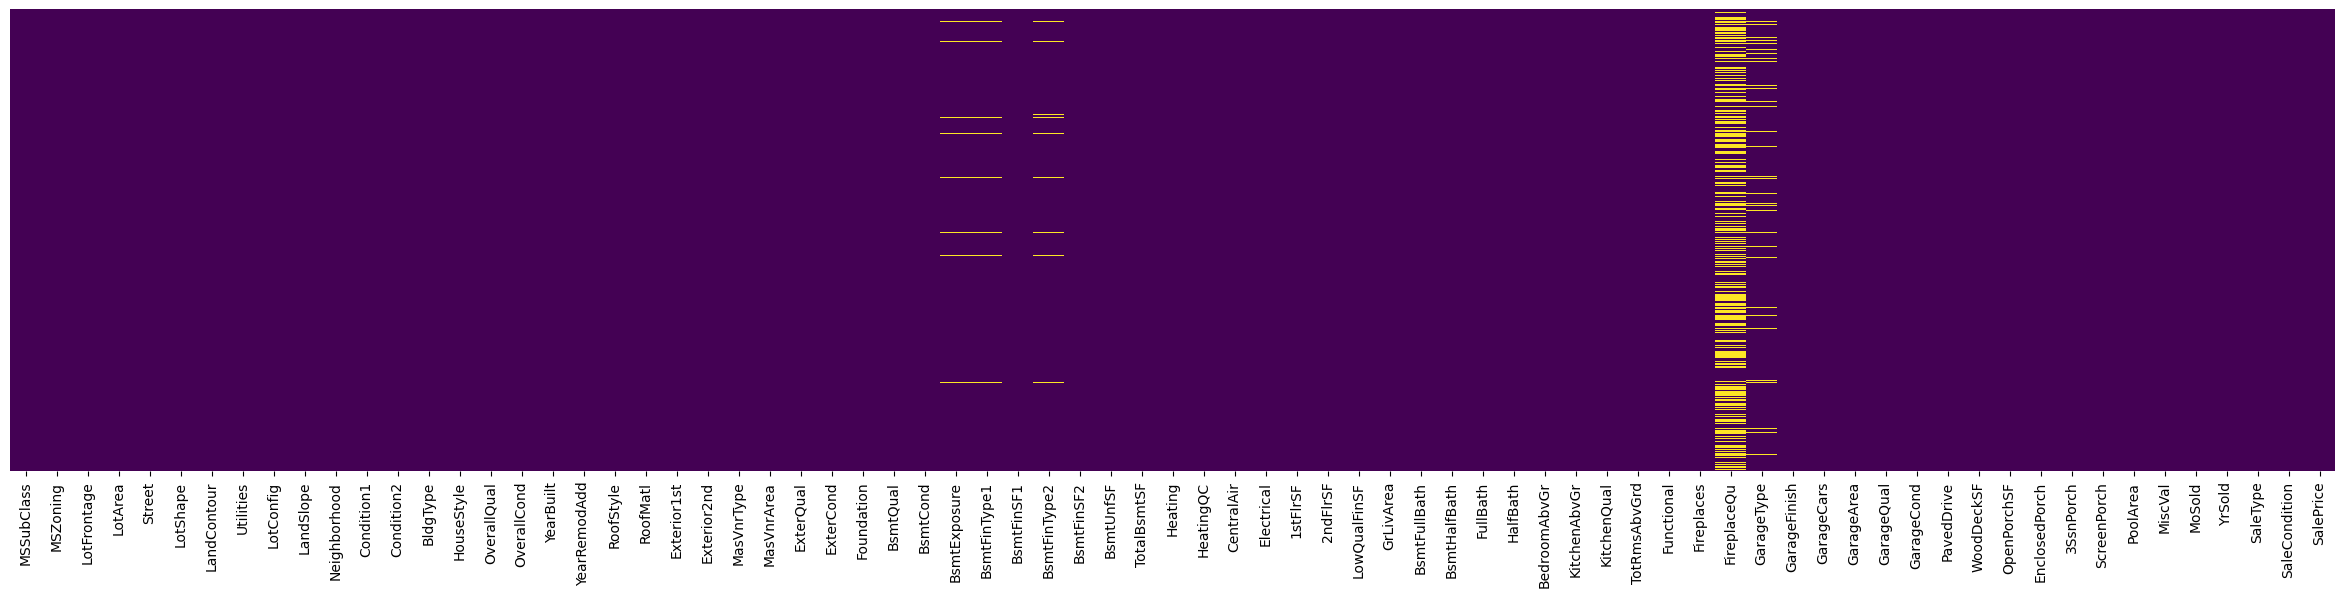

In [160]:
plt.figure(figsize=(30, 6))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [161]:
df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0], inplace=True)
df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0], inplace=True)
df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0], inplace=True)
df_train['Electrical'].fillna(df_train['Electrical'].mode()[0], inplace=True)
df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0], inplace=True)
df_train['GarageType'].fillna(df_train['GarageType'].mode()[0], inplace=True)



In [162]:
null_features = [features for features in df_train.columns if df_train[features].isnull().sum() > 0]
print(len(null_features))
print(null_features)

0
[]


<AxesSubplot: >

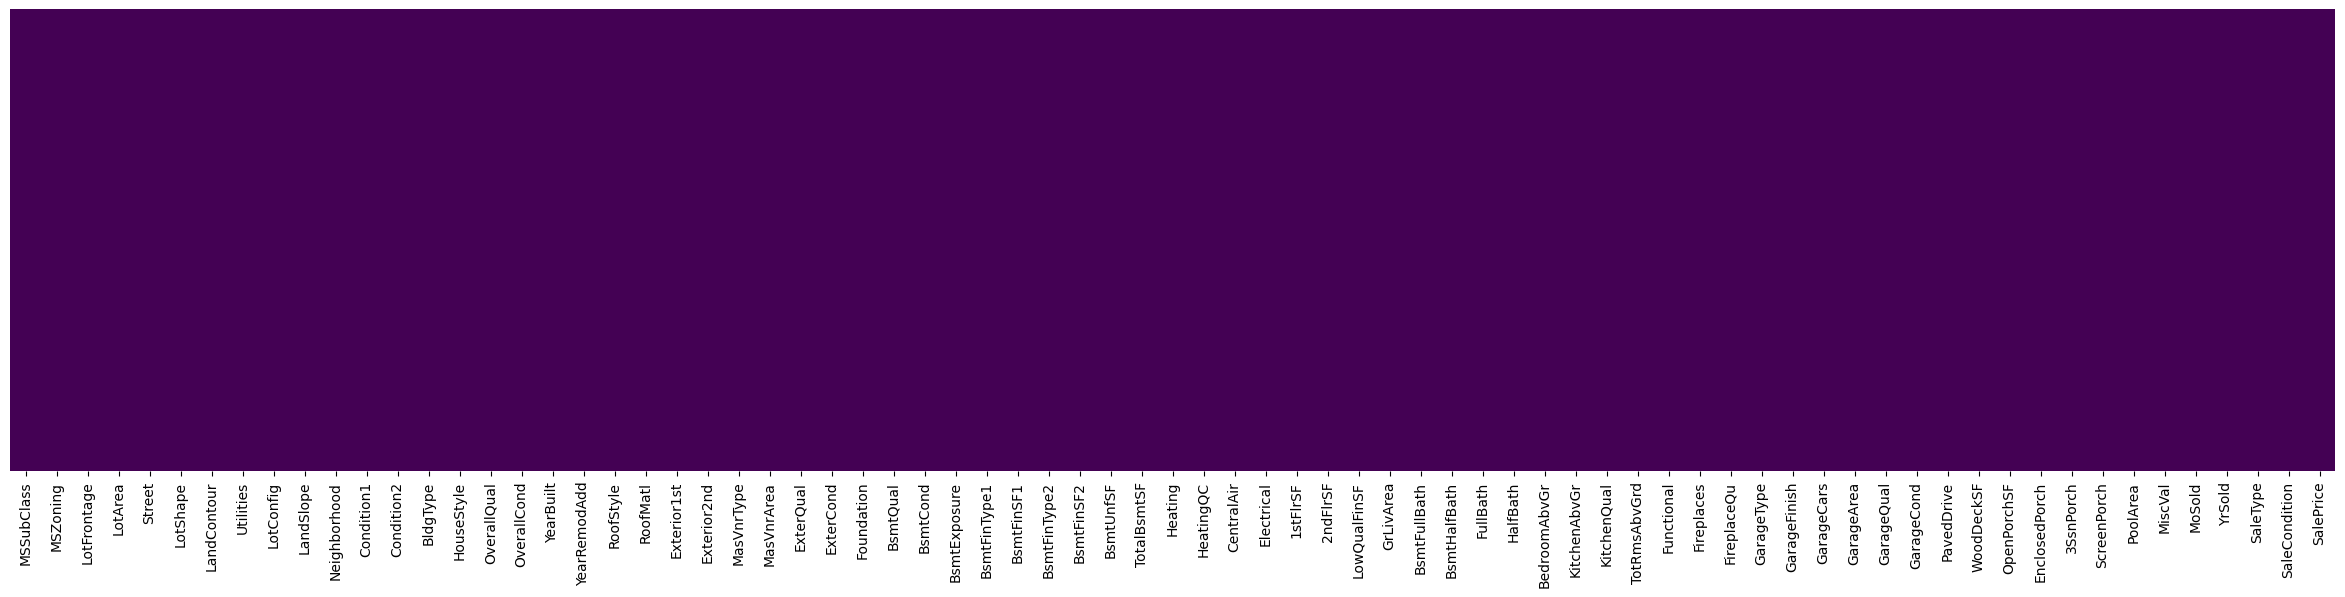

In [163]:
plt.figure(figsize=(30, 6))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [164]:
df_train.shape

(1460, 75)

In [165]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# Handle Categorical Features

In [166]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [167]:
cat_col = [features for features in df_train.columns if df_train[features].dtype == 'object']
print(len(cat_col))
print(cat_col)

39
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [168]:
main_df = df_train.copy()

In [169]:
## Combine Test Data 
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [170]:
df_test.shape

(1459, 76)

In [171]:
df_test.drop('FireplaceQu', axis=1, inplace=True)

In [172]:
df_test.drop('LotFrontage', axis=1, inplace=True)

In [173]:
null_features = [features for features in df_test.columns if df_test[features].isnull().sum() > 50]
print(len(null_features))
print(null_features)

5
['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [174]:
df_test[null_features].isnull().sum()

GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageQual      78
GarageCond      78
dtype: int64

In [175]:
for feature in null_features:
    df_test[feature].fillna(df_test[feature].mode()[0], inplace=True)

In [176]:
null_features = [features for features in df_test.columns if df_test[features].isnull().sum() > 0]
print(len(null_features))
print(null_features)

22
['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [177]:
for feature in null_features:
    df_test[feature].fillna(df_test[feature].mode()[0], inplace=True)

In [178]:
null_features = [features for features in df_test.columns if df_test[features].isnull().sum() > 0]
print(len(null_features))
print(null_features)

0
[]


In [179]:
final_df = pd.concat([df_train, df_test], axis=0)

In [180]:
final_df.shape

(2919, 77)

In [181]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [182]:
final_df=category_onehot_multcols(cat_col)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [183]:
final_df.shape

(2919, 238)

In [184]:
print(type(final_df.columns))
print(type(final_df.columns.duplicated()))

<class 'pandas.core.indexes.base.Index'>
<class 'numpy.ndarray'>


In [185]:
final_df = final_df.groupby(lambda x: x, axis=1).first()
final_df.shape

(2919, 178)

In [186]:
X_train=final_df.iloc[:1460,:]
x_test=final_df.iloc[1460:,:]

In [187]:
X_train.head()

,1.5Unf,1Story,1stFlrSF,2.5Fin,2.5Unf,2Story,2fmCon,2ndFlrSF,3SsnPorch,AdjLand,...,Wd Shng,WdShake,WdShing,WdShngl,Wood,WoodDeckSF,Y,YearBuilt,YearRemodAdd,YrSold
0,0.0,0.0,856.0,0.0,0.0,1.0,0.0,854.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2003.0,2003.0,2008.0
1,0.0,1.0,1262.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,298.0,1.0,1976.0,1976.0,2007.0
2,0.0,0.0,920.0,0.0,0.0,1.0,0.0,866.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2001.0,2002.0,2008.0
3,0.0,0.0,961.0,0.0,0.0,1.0,0.0,756.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1915.0,1970.0,2006.0
4,0.0,0.0,1145.0,0.0,0.0,1.0,0.0,1053.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,192.0,1.0,2000.0,2000.0,2008.0


In [188]:
x_test.head()

,1.5Unf,1Story,1stFlrSF,2.5Fin,2.5Unf,2Story,2fmCon,2ndFlrSF,3SsnPorch,AdjLand,...,Wd Shng,WdShake,WdShing,WdShngl,Wood,WoodDeckSF,Y,YearBuilt,YearRemodAdd,YrSold
0,0.0,1.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,140.0,1.0,1961.0,1961.0,2010.0
1,0.0,1.0,1329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,393.0,1.0,1958.0,1958.0,2010.0
2,0.0,0.0,928.0,0.0,0.0,1.0,0.0,701.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,212.0,1.0,1997.0,1998.0,2010.0
3,0.0,0.0,926.0,0.0,0.0,1.0,0.0,678.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,360.0,1.0,1998.0,1998.0,2010.0
4,0.0,1.0,1280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1992.0,1992.0,2010.0


In [189]:
x_test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\bhavy\AppData\Local\Temp\ipykernel_13888\2867764434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(['SalePrice'],axis=1,inplace=True)


In [190]:
X_train.drop(['SalePrice'],axis=1,inplace=True)
y_train = df_train['SalePrice']

C:\Users\bhavy\AppData\Local\Temp\ipykernel_13888\3641226118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['SalePrice'],axis=1,inplace=True)


# Prediciton and selecting the Algorithm

In [191]:
import xgboost
classifier=xgboost.XGBRegressor()
regressor=xgboost.XGBRegressor()

In [192]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [193]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [194]:
from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [195]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [196]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [197]:
regressor = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)


In [198]:
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=None, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [199]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [200]:
x_test.shape

(1459, 177)

In [201]:
x_test.head()


,1.5Unf,1Story,1stFlrSF,2.5Fin,2.5Unf,2Story,2fmCon,2ndFlrSF,3SsnPorch,AdjLand,...,Wd Shng,WdShake,WdShing,WdShngl,Wood,WoodDeckSF,Y,YearBuilt,YearRemodAdd,YrSold
0,0.0,1.0,896.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,140.0,1.0,1961.0,1961.0,2010.0
1,0.0,1.0,1329.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,393.0,1.0,1958.0,1958.0,2010.0
2,0.0,0.0,928.0,0.0,0.0,1.0,0.0,701.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,212.0,1.0,1997.0,1998.0,2010.0
3,0.0,0.0,926.0,0.0,0.0,1.0,0.0,678.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,360.0,1.0,1998.0,1998.0,2010.0
4,0.0,1.0,1280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1992.0,1992.0,2010.0


In [202]:
null_features = [features for features in x_test.columns if x_test[features].isnull().sum() > 0]
print(len(null_features))
print(null_features)

1
['LotFrontage']


In [203]:
x_test.drop(['SalePrice'],axis=1,inplace=True)

KeyError: "['SalePrice'] not found in axis"

In [ ]:
# x_test.dropna(axis=0,inplace=True)

C:\Users\bhavy\AppData\Local\Temp\ipykernel_13888\2700979806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.dropna(axis=0,inplace=True)


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer object with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data
imputer.fit(x_test)

# Transform the data by replacing missing values with the mean
x_test = imputer.transform(x_test)

ValueError: Found array with 0 sample(s) (shape=(0, 177)) while a minimum of 1 is required by SimpleImputer.

In [ ]:
y_pred=regressor.predict(x_test)

XGBoostError: [01:18:19] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\c_api\c_api_utils.h:167: Invalid missing value: null